In [3]:
from analysis_auxiliar import *
import pandas as pd
import seaborn as sns

sns.set(font_scale = 1.2)
sns.set_style("whitegrid")
sns.set_palette(palette = "Blues", n_colors = 3, desat = 1)

Merge all information in the same dataframe

In [4]:
df = get_df_from_files()
df_backup = df.copy()       # save the initial
df = df.drop(index=[16])    # Rejection due to technical errors

# General information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1.0 to 70.0
Columns: 120 entries, Force Quit to Prosocial behaviour time [min]
dtypes: datetime64[ns](2), float64(71), int64(29), object(18)
memory usage: 65.2+ KB


In [6]:
df.describe()

,Force Quit,Help Q1,Help Q10,Help Q11,Help Q12,Help Q13,Help Q14,Help Q15,Help Q2,Help Q3,...,I would describe myself as a pretty soft-hearted person.,"When I watch a good movie, I can very easily put myself in the place of a leading character.","When I'm upset at someone, I usually try to ""put myself in his shoes"" for a while.","When I am reading an interesting story or novel, I imagine how I would feel if the events in the story were happening to me.","Before criticizing somebody, I try to imagine how I would feel if I were in their place.",Communicative skills [1-7],Caring [1-7],Likeable [1-7],Empathetic [1-7],Need for collecting data [1-7]
count,69.0,69.000000,69.000000,69.000000,69.000000,69.0,69.0,69.000000,69.000000,69.0,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.0,0.159420,0.057971,0.043478,0.014493,0.0,0.0,0.101449,0.043478,0.0,...,2.724638,2.304348,2.246377,2.289855,2.739130,5.768116,4.231884,5.217391,3.724638,4.884058
std,0.0,0.406679,0.235401,0.205425,0.120386,0.0,0.0,0.304135,0.205425,0.0,...,1.083079,1.128564,1.193189,1.072400,0.964856,0.909831,1.699004,1.423227,1.570725,1.649744
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,1.000000,1.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,2.000000,2.000000,1.000000,2.000000,2.000000,5.000000,3.000000,4.000000,3.000000,4.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,3.000000,2.000000,2.000000,2.000000,3.000000,6.000000,5.000000,6.000000,4.000000,5.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,4.000000,3.000000,3.000000,3.000000,3.000000,6.000000,5.000000,6.000000,5.000000,6.000000
max,0.0,2.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0,...,4.000000,4.000000,4.000000,4.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000


# Demography analysis

In [7]:
DEMOGRAPHY_PATH = "../../../../HandIns/Thesis/Figures/Demography"# "Plots/Demography"
try: os.system("mkdir "+DEMOGRAPHY_PATH)
except: pass # Path already exists

mkdir: ../../../../HandIns/Thesis/Figures/Demography: File exists


Number of validated participants

In [8]:
df.shape[0]

69

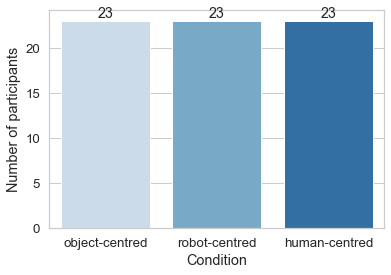

In [9]:
# participants per condition
g = sns.countplot(
    x="Condition",
    data=df,
    order = ["object-centred","robot-centred","human-centred"],
    )
g.set(xlabel='Condition', ylabel='Number of participants')
g.bar_label(g.containers[0])
plt.savefig(f"./{DEMOGRAPHY_PATH}/Participants_per_condition.pdf",bbox_inches='tight')

In [10]:
# age
df["Age"].describe()

count    69.000000
mean     24.826087
std       4.183147
min      19.000000
25%      22.000000
50%      23.000000
75%      26.000000
max      39.000000
Name: Age, dtype: float64

In [11]:
# age
df["Gender"].value_counts()

Male      39
Female    30
Name: Gender, dtype: int64

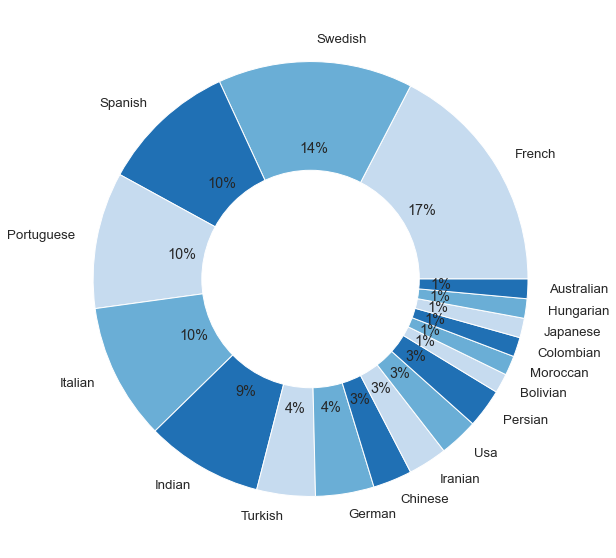

In [12]:
# nationality
nationalities_count = list(df["Nationality"].value_counts())
plt.pie(
    nationalities_count,
    labels=[country.capitalize() for country in df["Nationality"].value_counts().index],
    autopct='%.0f%%')

p = plt.gcf()
p.set_size_inches(10,10)
p.gca().add_artist(plt.Circle( (0,0), 0.5, color='white'))
plt.savefig(f"./{DEMOGRAPHY_PATH}/Nationalities.pdf",bbox_inches='tight')
plt.show()



In [13]:
df["Education"].value_counts()

Bachelors degree                               31
Masters degree                                 24
High School degree or equivalent (E.g. GED)     5
Some college but no degree                      5
Doctoral Degree                                 4
Name: Education, dtype: int64

In [14]:
df["Studies"].value_counts()

Computer Science                                   15
Electrical Engineering                              6
Aerospace Engineering                               4
Machine Learning                                    4
Another field                                       4
Engineering Physics                                 4
Industrial Management                               3
Systems, Control and Robotics                       3
It does not apply.                                  3
Vehicle Engineering                                 2
Chemistry                                           2
Engineering Mechanics                               2
Renewable Energy                                    2
Production Engineering and Management               2
Molecular Techniques in Life Science                1
Chemical Engineering for Energy and Environment     1
Civil and Architectural Engineering                 1
Embedded Systems                                    1
Medical Engineering         

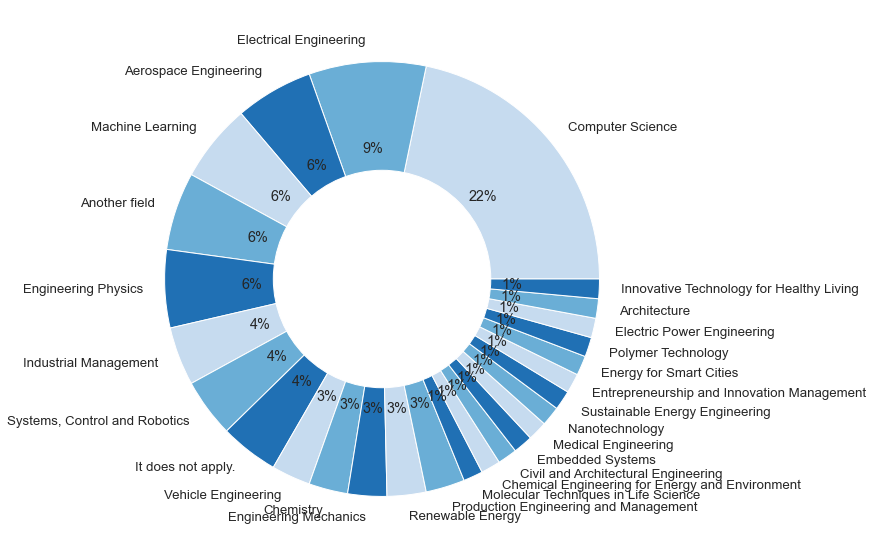

In [15]:
studies_count = df["Studies"].value_counts()

plt.pie(
    studies_count,
    labels=df["Studies"].value_counts().index,
    autopct='%.0f%%')

p = plt.gcf()
p.set_size_inches(10,10)
p.gca().add_artist(plt.Circle( (0,0), 0.5, color='white'))

plt.savefig(f"./{DEMOGRAPHY_PATH}/Background.pdf",bbox_inches='tight')
plt.show()


In [16]:
print(df["Interactions with SORO"].value_counts())
df["Interactions with SORO"].describe()

0     27
2     11
3     10
1      7
10     6
6      3
4      2
8      2
5      1
Name: Interactions with SORO, dtype: int64


count    69.000000
mean      2.405797
std       3.054981
min       0.000000
25%       0.000000
50%       2.000000
75%       3.000000
max      10.000000
Name: Interactions with SORO, dtype: float64

# Perspective-Taking

In [17]:
PT_PATH = "../../../../HandIns/Thesis/Figures/PT"#"Plots/PT"
try: os.system("mkdir "+PT_PATH)
except: pass # Path already exists

mkdir: ../../../../HandIns/Thesis/Figures/PT: File exists


## Big scope analysis of instructions

### General analysis of Mistakes, Help and Tries per Group

Total mistakes                                             \
                        count       mean       std  min  25%   50%   75%   
Condition                                                                  
human-centred            23.0   2.652174  2.673246  0.0  0.5   2.0   4.0   
object-centred           23.0   9.478261  7.567091  0.0  4.5   8.0  11.0   
robot-centred            23.0  11.695652  8.401487  2.0  4.0  11.0  15.0   

                     Total tries                                               \
                 max       count       mean       std   min   25%   50%   75%   
Condition                                                                       
human-centred   11.0        23.0  17.913043  2.810905  15.0  16.0  18.0  19.5   
object-centred  31.0        23.0  25.304348  7.150555  17.0  20.0  23.0  26.5   
robot-centred   34.0        23.0  27.217391  8.223893  17.0  20.5  26.0  30.5   

                      
                 max  
Condition             
human-centred   26.0  
object-centred  46.0  
robot-centred   49.0

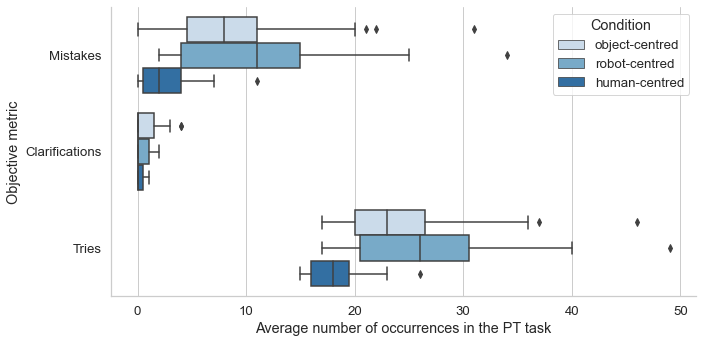

In [18]:
# General analysis of Mistakes, Help and Tries per Group
df_new = df[["Total mistakes", "Total help", "Total tries"]].copy()
df_new.rename(columns = {
    "Total mistakes" : "Mistakes",
    "Total help" : "Clarifications",
    "Total tries" : "Tries"
    }, inplace = True)

df_new_describe = df_new.copy()

df_new = df_new.stack().reset_index()

for i, j in enumerate(df_new["level_0"]):
    df_new.loc[i, "level_0"] = df["Condition"].loc[j]

df_new.rename(columns = {
        0 : "Average number of occurrences in the PT task",
        "level_1" : "Objective metric",
        "level_0" : "Condition"
        }, inplace = True)

grouped_boxplot(df_new, x = "Objective metric", y = "Average number of occurrences in the PT task", hue = "Condition", path = PT_PATH, aspect = 2, orient = "h")
df[["Condition", "Total mistakes", "Total tries"]].groupby("Condition").describe()

In [19]:
all_mean_robot = df[df["Condition"]=="robot-centred"][["Mistakes Q3","Mistakes Q4","Mistakes Q5","Mistakes Q6","Mistakes Q7","Mistakes Q9","Mistakes Q10","Mistakes Q11","Mistakes Q12","Mistakes Q13","Mistakes Q14"]].mean().mean()
all_mean_human = df[df["Condition"]=="human-centred"][["Mistakes Q3","Mistakes Q4","Mistakes Q5","Mistakes Q6","Mistakes Q7","Mistakes Q9","Mistakes Q10","Mistakes Q11","Mistakes Q12","Mistakes Q13","Mistakes Q14"]].mean().mean()

print(f'Participants made {100*all_mean_robot/all_mean_human:.2f}% more mistakes when the robot took its perspective (Robot) compared to when the robot took the'+" human's"+' perspective.')

Participants made 236.36% more mistakes when the robot took its perspective (Robot) compared to when the robot took the human's perspective.


### Time scanning objects

Total scanning time [min]                                \
                                   count      mean       std       min   
Condition                                                                
human-centred                       23.0  1.688268  0.310921  1.096500   
object-centred                      23.0  2.627486  1.010040  1.219500   
robot-centred                       23.0  2.999681  1.088051  1.501667   

                                                        
                     25%       50%       75%       max  
Condition                                               
human-centred   1.475750  1.625667  1.867583  2.246500  
object-centred  1.833417  2.322167  3.230833  4.897667  
robot-centred   2.049250  2.813333  3.628833  5.202333

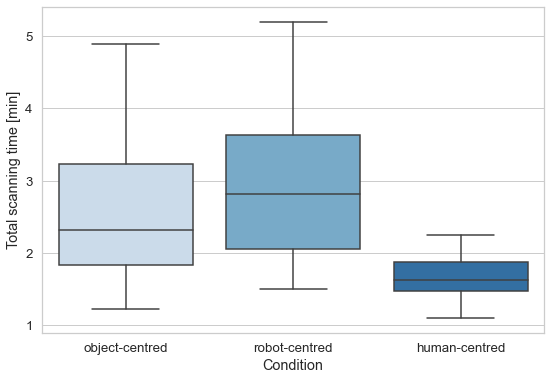

In [20]:
boxplot(df, x="Condition", y="Total scanning time [min]", path = PT_PATH, aspect=1.5)
df[["Condition","Total scanning time [min]"]].groupby(by="Condition").describe()

In [21]:
statistical(df, "Total tries")
statistical(df, "Total scanning time [min]")

F_onewayResult(statistic=13.152218685639397, pvalue=1.5581338072494958e-05)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred   7.3913 0.0008  2.7971 11.9855   True
 human-centred  robot-centred   9.3043    0.0  4.7101 13.8986   True
object-centred  robot-centred    1.913 0.5805 -2.6812  6.5073  False
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 7.59e-04 *** 
control  robot 2.27e-05 ****
  human  robot 5.80e-01     
----------------------------

F_onewayResult(statistic=13.69809080196066, pvalue=1.0570338159674156e-05)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower  upper  reject
--------------------------------------------------------

In [22]:
print(f'Participants spent {100*df[df["Condition"]=="object-centred"]["Total scanning time [min]"].mean()/df[df["Condition"]=="human-centred"]["Total scanning time [min]"].mean():.2f}% more time when the robot took the object-addressee perspective (Control) compared to when the robot took the'+" human's"+'perspective.')

print(f'Participants spent {100*df[df["Condition"]=="robot-centred"]["Total scanning time [min]"].mean()/df[df["Condition"]=="human-centred"]["Total scanning time [min]"].mean():.2f}% more time when the robot took its perspective (Robot) compared to when the robot took the'+" human's"+'perspective.')

Participants spent 155.63% more time when the robot took the object-addressee perspective (Control) compared to when the robot took the human'sperspective.
Participants spent 177.68% more time when the robot took its perspective (Robot) compared to when the robot took the human'sperspective.


### Time of the all interaction

Perspective taking task time [min]                      \
                                            count      mean       std   
Condition                                                               
human-centred                                23.0  3.731638  0.569668   
object-centred                               23.0  5.529928  1.963773   
robot-centred                                23.0  6.135594  2.052886   

                                                                   
                     min       25%       50%       75%        max  
Condition                                                          
human-centred   2.887667  3.287167  3.657833  3.958750   4.929833  
object-centred  3.012500  4.172000  4.921000  6.076333  10.914667  
robot-centred   3.489833  4.613583  5.654500  7.556500  10.043000

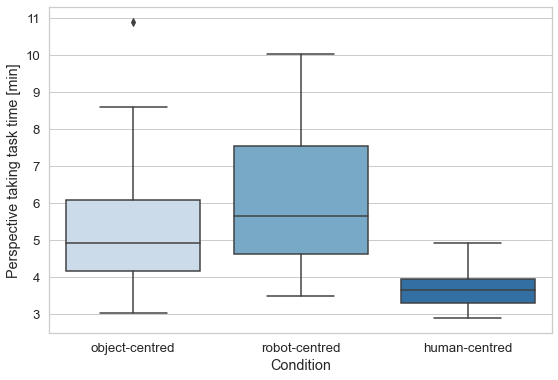

In [23]:
boxplot(df, x="Condition", y="Perspective taking task time [min]", path = PT_PATH, aspect = 1.5)
df[["Condition","Perspective taking task time [min]"]].groupby(by="Condition").describe()

## Analysis per each Instruction 

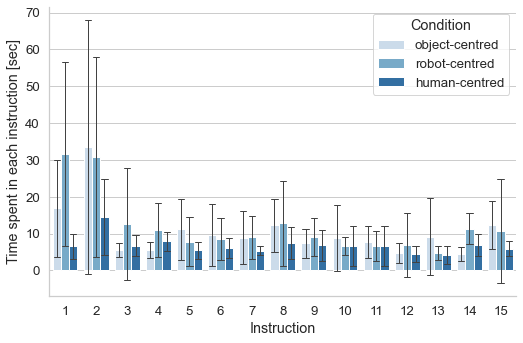

In [24]:
# get grouped barplot in the partial time
df_time = sort_by_word(df, "Time Q", "Condition")
df_time.rename(columns = {"Occurrences" : "Time spent in each instruction [sec]"}, inplace = True)
grouped_barplot(df_time, x = "Instruction", y = "Time spent in each instruction [sec]", hue = "Condition", path = PT_PATH, identifier="all", aspect=1.5)

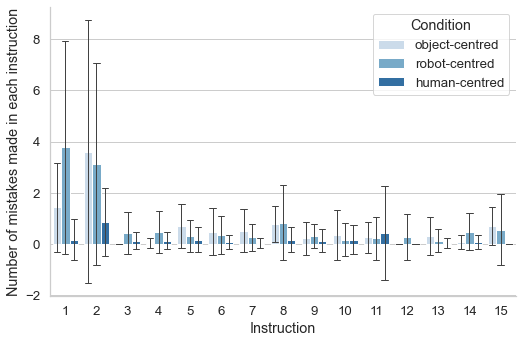

In [25]:
# get grouped barplot for the mistakes
df_mistakes = sort_by_word(df, "Mistakes Q", "Condition")
df_mistakes.rename(columns = {"Occurrences" : "Number of mistakes made in each instruction"}, inplace = True)
grouped_barplot(
    df = df_mistakes,
    x = "Instruction",
    y = "Number of mistakes made in each instruction",
    hue="Condition",
    path = PT_PATH,
    identifier="all",
    aspect = 1.5
)

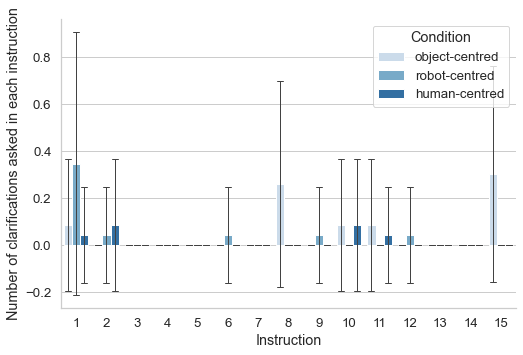

In [26]:
# get grouped barplot for the help
df_helps = sort_by_word(df, "Help Q", "Condition")
df_helps.rename(columns = {"Occurrences" : "Number of clarifications asked in each instruction"}, inplace = True)
grouped_barplot(
    df = df_helps,
    x = "Instruction",
    y = "Number of clarifications asked in each instruction",
    hue="Condition",
    path = PT_PATH,
    identifier="all"
)

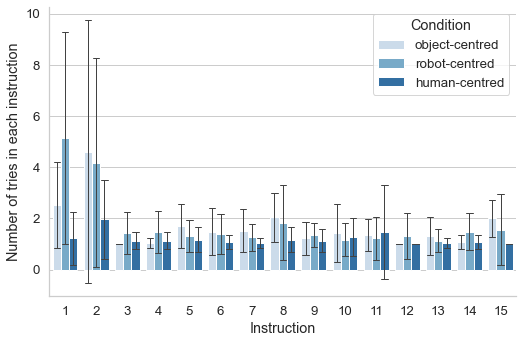

In [27]:
# get grouped barplot for the tries
df_tries = sort_by_word(df, "Tries Q", "Condition")
df_tries.rename(columns = {"Occurrences" : "Number of tries in each instruction"}, inplace = True)
grouped_barplot(
    df = df_tries,
    x = "Instruction",
    y = "Number of tries in each instruction",
    hue="Condition",
    path = PT_PATH,
    identifier="all"
)

## Analyze Ambiguities, Q: 1,8,15

### Evaluate by the time spent

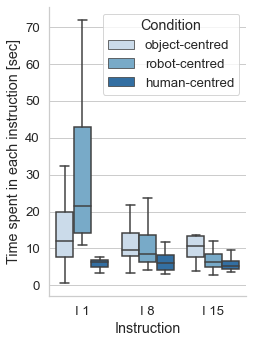

In [28]:
df_Qambiguous_time = analysis_ambiguities(df, "Time")
df_Qambiguous_time.rename(columns = {"Results" : "Time spent in each instruction [sec]"}, inplace = True)
grouped_boxplot(df_Qambiguous_time, x="Instruction", y="Time spent in each instruction [sec]", hue="Condition", orient = "v", path=PT_PATH, aspect=0.75, identifier="ambiguous", outliers=False)

In [29]:
df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 1"].groupby(by="Condition").describe()

Time spent in each instruction [sec]                        \
                                              count       mean        std   
Condition                                                                   
human-centred                                  23.0   6.515652   3.494126   
object-centred                                 23.0  16.905217  13.477386   
robot-centred                                  23.0  31.536522  25.607399   

                                                      
                  min     25%    50%     75%     max  
Condition                                             
human-centred    3.45   4.920   6.27   6.840   21.49  
object-centred   0.62   7.665  11.91  19.960   57.63  
robot-centred   10.89  14.120  21.42  42.815  106.48

In [30]:
df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 8"].groupby(by="Condition").describe()

Time spent in each instruction [sec]                        \
                                              count       mean        std   
Condition                                                                   
human-centred                                  23.0   7.391304   4.528275   
object-centred                                 23.0  12.257391   7.310644   
robot-centred                                  23.0  12.803478  11.825861   

                                                 
                 min   25%   50%     75%    max  
Condition                                        
human-centred   3.11  4.29  5.99   8.105  23.82  
object-centred  3.25  8.08  9.47  14.290  35.25  
robot-centred   4.13  6.28  8.42  13.635  50.40

In [31]:
df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 15"].groupby(by="Condition").describe()

Time spent in each instruction [sec]                        \
                                              count       mean        std   
Condition                                                                   
human-centred                                  23.0   5.901739   2.121725   
object-centred                                 23.0  12.354348   6.606307   
robot-centred                                  23.0  10.605652  14.394085   

                                                   
                 min    25%    50%     75%    max  
Condition                                          
human-centred   3.51  4.465   5.33   6.625  12.04  
object-centred  4.04  7.780  10.61  13.325  26.40  
robot-centred   2.92  5.055   6.24   8.485  71.50

In [32]:
statistical(df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 1"], "Time spent in each instruction [sec]")
statistical(df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 8"], "Time spent in each instruction [sec]")
statistical(df_Qambiguous_time[df_Qambiguous_time["Instruction"]=="I 15"], "Time spent in each instruction [sec]")

F_onewayResult(statistic=12.83294608071559, pvalue=1.9592663225893172e-05)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred  10.3896 0.0989 -1.5089  22.288  False
 human-centred  robot-centred  25.0209    0.0 13.1224 36.9193   True
object-centred  robot-centred  14.6313 0.0121  2.7329 26.5297   True
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 9.89e-02     
control  robot 1.14e-05 ****
  human  robot 1.21e-02 *   
----------------------------

F_onewayResult(statistic=2.8652211125754694, pvalue=0.06408171093916164)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
-------------------------------------------------------

### Evaluate by the number of mistakes made

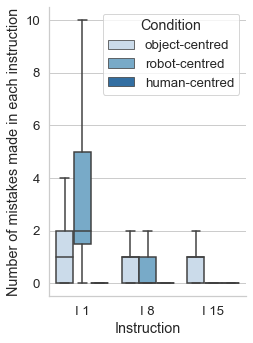

In [33]:
df_Qambiguous_mistakes = analysis_ambiguities(df, "Mistakes")
df_Qambiguous_mistakes.rename(columns = {"Results" : "Number of mistakes made in each instruction"}, inplace = True)
grouped_boxplot(df_Qambiguous_mistakes, x="Instruction", y="Number of mistakes made in each instruction", hue="Condition", path=PT_PATH, aspect=0.75, identifier="ambiguous", outliers=False)

In [34]:
df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 1"].groupby(by="Condition").describe()

Number of mistakes made in each instruction            \
                                                     count      mean   
Condition                                                              
human-centred                                         23.0  0.173913   
object-centred                                        23.0  1.434783   
robot-centred                                         23.0  3.782609   

                                                    
                     std  min  25%  50%  75%   max  
Condition                                           
human-centred   0.834058  0.0  0.0  0.0  0.0   4.0  
object-centred  1.779328  0.0  0.0  1.0  2.0   8.0  
robot-centred   4.252876  0.0  1.5  2.0  5.0  19.0

In [35]:
df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 8"].groupby(by="Condition").describe()

Number of mistakes made in each instruction            \
                                                     count      mean   
Condition                                                              
human-centred                                         23.0  0.173913   
object-centred                                        23.0  0.782609   
robot-centred                                         23.0  0.826087   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.491026  0.0  0.0  0.0  0.0  2.0  
object-centred  0.735868  0.0  0.0  1.0  1.0  2.0  
robot-centred   1.497033  0.0  0.0  0.0  1.0  6.0

In [36]:
df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 15"].groupby(by="Condition").describe()

Number of mistakes made in each instruction            \
                                                     count      mean   
Condition                                                              
human-centred                                         23.0  0.000000   
object-centred                                        23.0  0.695652   
robot-centred                                         23.0  0.565217   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.000000  0.0  0.0  0.0  0.0  0.0  
object-centred  0.764840  0.0  0.0  1.0  1.0  2.0  
robot-centred   1.408613  0.0  0.0  0.0  0.0  6.0

In [37]:
statistical(df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 1"], "Number of mistakes made in each instruction")
statistical(df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 8"], "Number of mistakes made in each instruction")
statistical(df_Qambiguous_mistakes[df_Qambiguous_mistakes["Instruction"]=="I 15"], "Number of mistakes made in each instruction")

F_onewayResult(statistic=10.544390419593011, pvalue=0.00010621770506083416)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred   1.2609  0.261 -0.6516 3.1733  False
 human-centred  robot-centred   3.6087 0.0001  1.6962 5.5211   True
object-centred  robot-centred   2.3478 0.0123  0.4354 4.2603   True
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 2.61e-01     
control  robot 7.62e-05 ****
  human  robot 1.23e-02 *   
----------------------------

F_onewayResult(statistic=3.0339869281045737, pvalue=0.054884987053602126)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
--------------------------------------------------------------

### Evaluate by the number of clarifications asked

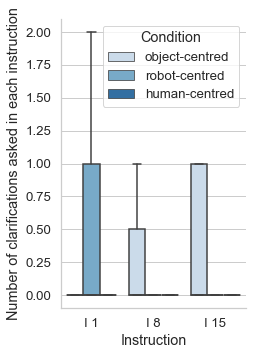

In [38]:
df_Qambiguous_helps = analysis_ambiguities(df, "Help")
df_Qambiguous_helps.rename(columns = {"Results" : "Number of clarifications asked in each instruction"}, inplace = True)
grouped_boxplot(df_Qambiguous_helps, x="Instruction", y="Number of clarifications asked in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=0.75, identifier="ambiguous", outliers=False)

In [39]:
df_Qambiguous_helps[df_Qambiguous_helps["Instruction"]=="I 1"].groupby(by="Condition").describe()

Number of clarifications asked in each instruction            \
                                                            count      mean   
Condition                                                                     
human-centred                                                23.0  0.043478   
object-centred                                               23.0  0.086957   
robot-centred                                                23.0  0.347826   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.208514  0.0  0.0  0.0  0.0  1.0  
object-centred  0.288104  0.0  0.0  0.0  0.0  1.0  
robot-centred   0.572768  0.0  0.0  0.0  1.0  2.0

In [40]:
df_Qambiguous_helps[df_Qambiguous_helps["Instruction"]=="I 8"].groupby(by="Condition").describe()

Number of clarifications asked in each instruction           \
                                                            count     mean   
Condition                                                                    
human-centred                                                23.0  0.00000   
object-centred                                               23.0  0.26087   
robot-centred                                                23.0  0.00000   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.000000  0.0  0.0  0.0  0.0  0.0  
object-centred  0.448978  0.0  0.0  0.0  0.5  1.0  
robot-centred   0.000000  0.0  0.0  0.0  0.0  0.0

In [41]:
df_Qambiguous_helps[df_Qambiguous_helps["Instruction"]=="I 15"].groupby(by="Condition").describe()

Number of clarifications asked in each instruction            \
                                                            count      mean   
Condition                                                                     
human-centred                                                23.0  0.000000   
object-centred                                               23.0  0.304348   
robot-centred                                                23.0  0.000000   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.000000  0.0  0.0  0.0  0.0  0.0  
object-centred  0.470472  0.0  0.0  0.0  1.0  1.0  
robot-centred   0.000000  0.0  0.0  0.0  0.0  0.0

### Evaluate by the number of tries

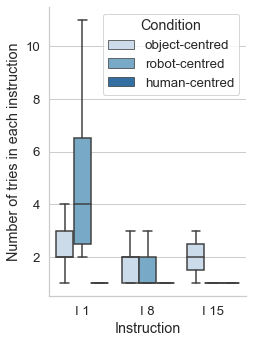

In [42]:
df_Qambiguous_tries = analysis_ambiguities(df, "Tries")
df_Qambiguous_tries.rename(columns = {"Results" : "Number of tries in each instruction"}, inplace = True)
grouped_boxplot(df_Qambiguous_tries, x="Instruction", y="Number of tries in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=0.75, identifier="ambiguous", outliers=False)

In [43]:
df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 1"].groupby(by="Condition").describe()

Number of tries in each instruction                           \
                                             count      mean       std  min   
Condition                                                                     
human-centred                                 23.0  1.217391  1.042572  1.0   
object-centred                                23.0  2.521739  1.728624  1.0   
robot-centred                                 23.0  5.130435  4.224435  2.0   

                                     
                25%  50%  75%   max  
Condition                            
human-centred   1.0  1.0  1.0   6.0  
object-centred  2.0  2.0  3.0   9.0  
robot-centred   2.5  4.0  6.5  20.0

In [44]:
df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 8"].groupby(by="Condition").describe()

Number of tries in each instruction                           \
                                             count      mean       std  min   
Condition                                                                     
human-centred                                 23.0  1.173913  0.491026  1.0   
object-centred                                23.0  2.043478  0.975997  1.0   
robot-centred                                 23.0  1.826087  1.497033  1.0   

                                    
                25%  50%  75%  max  
Condition                           
human-centred   1.0  1.0  1.0  3.0  
object-centred  1.0  2.0  2.0  4.0  
robot-centred   1.0  1.0  2.0  7.0

In [45]:
df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 15"].groupby(by="Condition").describe()

Number of tries in each instruction                           \
                                             count      mean       std  min   
Condition                                                                     
human-centred                                 23.0  1.000000  0.000000  1.0   
object-centred                                23.0  2.000000  0.738549  1.0   
robot-centred                                 23.0  1.565217  1.408613  1.0   

                                    
                25%  50%  75%  max  
Condition                           
human-centred   1.0  1.0  1.0  1.0  
object-centred  1.5  2.0  2.5  3.0  
robot-centred   1.0  1.0  1.0  7.0

In [46]:
statistical(df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 1"], "Number of tries in each instruction")
statistical(df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 8"], "Number of tries in each instruction")
statistical(df_Qambiguous_tries[df_Qambiguous_tries["Instruction"]=="I 15"], "Number of tries in each instruction")

F_onewayResult(statistic=12.49549224666426, pvalue=2.5003675931101185e-05)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred   1.3043 0.2377 -0.6069 3.2156  False
 human-centred  robot-centred    3.913    0.0  2.0018 5.8243   True
object-centred  robot-centred   2.6087 0.0048  0.6975 4.5199   True
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 2.38e-01     
control  robot 1.87e-05 ****
  human  robot 4.77e-03 **  
----------------------------

F_onewayResult(statistic=4.113924050632911, pvalue=0.02071300698232078)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------

## Instruction: 8th (ambiguous) VS 14th (not ambiguous)

### Evaluate by the time spent

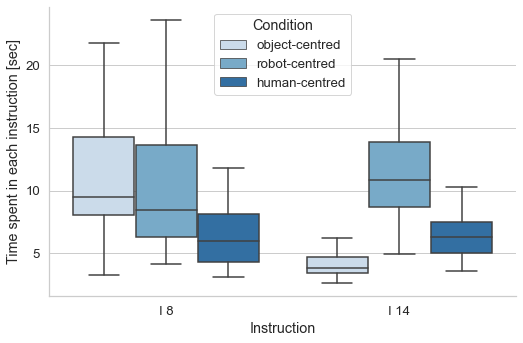

In [47]:
df_pair_sentences_type1_time = comapre_ambiguity_sentences(df, qa="8", qna="14", m="Time")
df_pair_sentences_type1_time.rename(columns = {"Results" : "Time spent in each instruction [sec]"}, inplace = True)
grouped_boxplot(df_pair_sentences_type1_time, x="Instruction", y="Time spent in each instruction [sec]", hue="Condition", path=PT_PATH, aspect=1.5, identifier="type1", outliers = False)

Instruction 14, instruction 8 was computed in the section specific for ambiguous instructions.

In [48]:
df_pair_sentences_type1_time[df_pair_sentences_type1_time["Instruction"]=="I 14"].groupby(by="Condition").describe()

Time spent in each instruction [sec]                       \
                                              count       mean       std   
Condition                                                                  
human-centred                                  23.0   6.836087  2.999174   
object-centred                                 23.0   4.439130  1.843048   
robot-centred                                  23.0  11.355652  4.335218   

                                                   
                 min    25%    50%     75%    max  
Condition                                          
human-centred   3.55  5.010   6.30   7.520  17.97  
object-centred  2.61  3.435   3.81   4.725  10.45  
robot-centred   4.92  8.720  10.84  13.870  21.60

In [49]:
statistical(df_pair_sentences_type1_time[df_pair_sentences_type1_time["Instruction"]=="I 14"], "Time spent in each instruction [sec]")

F_onewayResult(statistic=27.29163808691055, pvalue=2.303967025337077e-09)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred   -2.397 0.0371 -4.6766 -0.1173   True
 human-centred  robot-centred   4.5196    0.0  2.2399  6.7992   True
object-centred  robot-centred   6.9165    0.0  4.6369  9.1962   True
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 3.71e-02 *   
control  robot 3.31e-05 ****
  human  robot 1.57e-09 ****
----------------------------



### Evaluate by the number of mistakes made

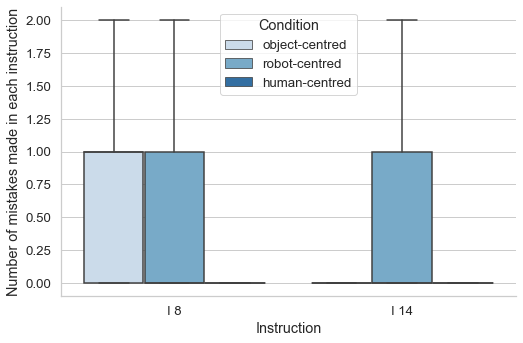

In [50]:
df_pair_sentences_type1_mistakes = comapre_ambiguity_sentences(df, qa="8", qna="14", m="Mistakes")
df_pair_sentences_type1_mistakes.rename(columns = {"Results" : "Number of mistakes made in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type1_mistakes, x="Instruction", y="Number of mistakes made in each instruction", hue="Condition", path=PT_PATH, aspect=1.5, identifier="type1", outliers = False)

Instruction 14, instruction 8 was computed in the section specific for ambiguous instructions.

In [51]:
df_pair_sentences_type1_mistakes[df_pair_sentences_type1_mistakes["Instruction"]=="I 14"].groupby(by="Condition").describe()

Number of mistakes made in each instruction            \
                                                     count      mean   
Condition                                                              
human-centred                                         23.0  0.086957   
object-centred                                        23.0  0.086957   
robot-centred                                         23.0  0.478261   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.288104  0.0  0.0  0.0  0.0  1.0  
object-centred  0.288104  0.0  0.0  0.0  0.0  1.0  
robot-centred   0.730477  0.0  0.0  0.0  1.0  2.0

### Evaluate by the number of clarifications asked

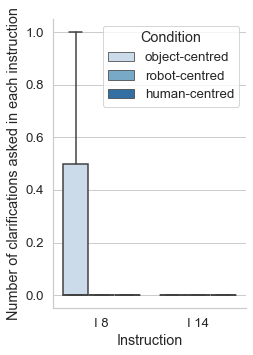

In [52]:
df_pair_sentences_type1_helps = comapre_ambiguity_sentences(df, qa="8", qna="14", m="Help")
df_pair_sentences_type1_helps.rename(columns = {"Results" : "Number of clarifications asked in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type1_helps, x="Instruction", y="Number of clarifications asked in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=0.75, identifier="type1")

Instruction 14, instruction 8 was computed in the section specific for ambiguous instructions.

In [53]:
df_pair_sentences_type1_helps[df_pair_sentences_type1_helps["Instruction"]=="I 14"].groupby(by="Condition").describe()

Number of clarifications asked in each instruction            \
                                                            count mean  std   
Condition                                                                     
human-centred                                                23.0  0.0  0.0   
object-centred                                               23.0  0.0  0.0   
robot-centred                                                23.0  0.0  0.0   

                                         
                min  25%  50%  75%  max  
Condition                                
human-centred   0.0  0.0  0.0  0.0  0.0  
object-centred  0.0  0.0  0.0  0.0  0.0  
robot-centred   0.0  0.0  0.0  0.0  0.0

### Evaluate by the number of tries

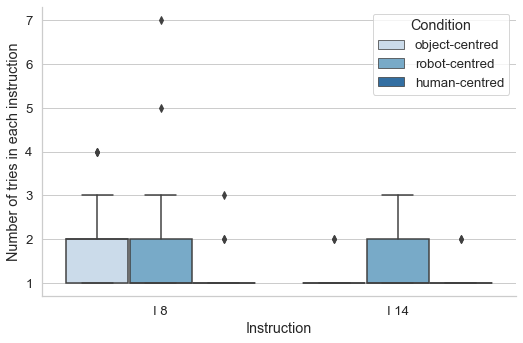

In [54]:
df_pair_sentences_type1_tries = comapre_ambiguity_sentences(df, qa="8", qna="14", m="Tries")
df_pair_sentences_type1_tries.rename(columns = {"Results" : "Number of tries in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type1_tries, x="Instruction", y="Number of tries in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=1.5, identifier="type1")

Instruction 14, instruction 8 was computed in the section specific for ambiguous instructions.

In [55]:
df_pair_sentences_type1_tries[df_pair_sentences_type1_tries["Instruction"]=="I 14"].groupby(by="Condition").describe()

Number of tries in each instruction                           \
                                             count      mean       std  min   
Condition                                                                     
human-centred                                 23.0  1.086957  0.288104  1.0   
object-centred                                23.0  1.086957  0.288104  1.0   
robot-centred                                 23.0  1.478261  0.730477  1.0   

                                    
                25%  50%  75%  max  
Condition                           
human-centred   1.0  1.0  1.0  2.0  
object-centred  1.0  1.0  1.0  2.0  
robot-centred   1.0  1.0  2.0  3.0

## Instruction: 15th (ambiguous) VS 4th (not ambiguous)

### Evaluate by the time spent

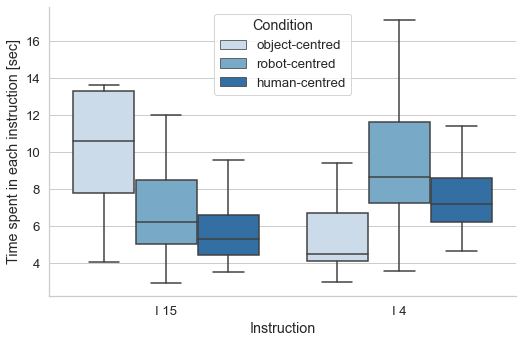

In [56]:
df_pair_sentences_type2_time = comapre_ambiguity_sentences(df, qa="15", qna="4", m="Time")
df_pair_sentences_type2_time.rename(columns = {"Results" : "Time spent in each instruction [sec]"}, inplace = True)
grouped_boxplot(df_pair_sentences_type2_time, x="Instruction", y="Time spent in each instruction [sec]", hue="Condition", path=PT_PATH, aspect=1.5, identifier="type2", outliers = False)

Instruction 4, instruction 15 was computed in the section specific for ambiguous instructions.

In [57]:
df_pair_sentences_type2_time[df_pair_sentences_type2_time["Instruction"]=="I 4"].groupby(by="Condition").describe()

Time spent in each instruction [sec]                       \
                                              count       mean       std   
Condition                                                                  
human-centred                                  23.0   7.866957  2.557809   
object-centred                                 23.0   5.574783  2.218355   
robot-centred                                  23.0  10.994348  7.524942   

                                                  
                 min    25%   50%     75%    max  
Condition                                         
human-centred   4.67  6.245  7.17   8.610  14.01  
object-centred  3.00  4.115  4.51   6.700  11.35  
robot-centred   3.56  7.275  8.66  11.605  33.52

In [58]:
statistical(df_pair_sentences_type2_time[df_pair_sentences_type2_time["Instruction"]=="I 4"], "Time spent in each instruction [sec]")

F_onewayResult(statistic=7.5001608671695665, pvalue=0.0011611473196443097)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred  -2.2922 0.2397 -5.6606 1.0762  False
 human-centred  robot-centred   3.1274 0.0742  -0.241 6.4958  False
object-centred  robot-centred   5.4196 0.0008  2.0512  8.788   True
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 2.40e-01     
control  robot 7.42e-02     
  human  robot 7.59e-04 *** 
----------------------------



### Evaluate by the number of mistakes made

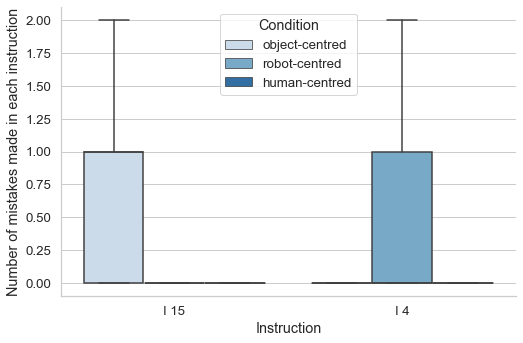

In [59]:
df_pair_sentences_type2_mistakes = comapre_ambiguity_sentences(df, qa="15", qna="4", m="Mistakes")
df_pair_sentences_type2_mistakes.rename(columns = {"Results" : "Number of mistakes made in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type2_mistakes, x="Instruction", y="Number of mistakes made in each instruction", hue="Condition", path=PT_PATH, aspect=1.5, identifier="type2", outliers = False)

Instruction 4, instruction 15 was computed in the section specific for ambiguous instructions.

In [60]:
df_pair_sentences_type2_mistakes[df_pair_sentences_type2_mistakes["Instruction"]=="I 4"].groupby(by="Condition").describe()

Number of mistakes made in each instruction            \
                                                     count      mean   
Condition                                                              
human-centred                                         23.0  0.130435   
object-centred                                        23.0  0.043478   
robot-centred                                         23.0  0.478261   

                                                   
                     std  min  25%  50%  75%  max  
Condition                                          
human-centred   0.344350  0.0  0.0  0.0  0.0  1.0  
object-centred  0.208514  0.0  0.0  0.0  0.0  1.0  
robot-centred   0.845822  0.0  0.0  0.0  1.0  3.0

### Evaluate by the number of clarifications asked

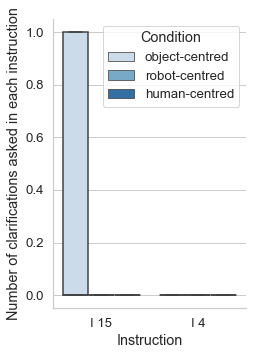

In [61]:
df_pair_sentences_type2_helps = comapre_ambiguity_sentences(df, qa="15", qna="4", m="Help")
df_pair_sentences_type2_helps.rename(columns = {"Results" : "Number of clarifications asked in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type2_helps, x="Instruction", y="Number of clarifications asked in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=0.75, identifier="type2")

Instruction 4, instruction 15 was computed in the section specific for ambiguous instructions.

In [62]:
df_pair_sentences_type2_helps[df_pair_sentences_type2_helps["Instruction"]=="I 4"].groupby(by="Condition").describe()

Number of clarifications asked in each instruction            \
                                                            count mean  std   
Condition                                                                     
human-centred                                                23.0  0.0  0.0   
object-centred                                               23.0  0.0  0.0   
robot-centred                                                23.0  0.0  0.0   

                                         
                min  25%  50%  75%  max  
Condition                                
human-centred   0.0  0.0  0.0  0.0  0.0  
object-centred  0.0  0.0  0.0  0.0  0.0  
robot-centred   0.0  0.0  0.0  0.0  0.0

### Evaluate by the number of tries

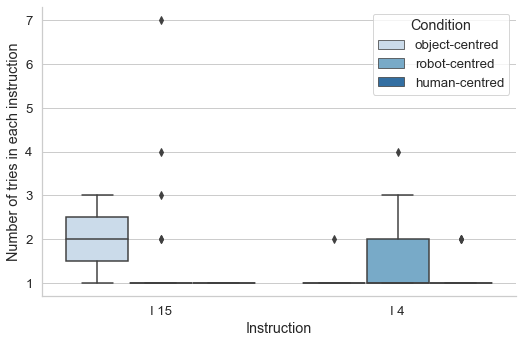

In [63]:
df_pair_sentences_type2_tries = comapre_ambiguity_sentences(df, qa="15", qna="4", m="Tries")
df_pair_sentences_type2_tries.rename(columns = {"Results" : "Number of tries in each instruction"}, inplace = True)
grouped_boxplot(df_pair_sentences_type2_tries, x="Instruction", y="Number of tries in each instruction", hue="Condition", orient = "v", path=PT_PATH, aspect=1.5, identifier="type2")

Instruction 4, instruction 15 was computed in the section specific for ambiguous instructions.

In [64]:
df_pair_sentences_type2_tries[df_pair_sentences_type2_tries["Instruction"]=="I 4"].groupby(by="Condition").describe()

Number of tries in each instruction                           \
                                             count      mean       std  min   
Condition                                                                     
human-centred                                 23.0  1.130435  0.344350  1.0   
object-centred                                23.0  1.043478  0.208514  1.0   
robot-centred                                 23.0  1.478261  0.845822  1.0   

                                    
                25%  50%  75%  max  
Condition                           
human-centred   1.0  1.0  1.0  2.0  
object-centred  1.0  1.0  1.0  2.0  
robot-centred   1.0  1.0  2.0  4.0

## Subjective Measures

F_onewayResult(statistic=3.5184757505773656, pvalue=0.03532179978409998)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred  -0.3043 0.6006 -1.0596  0.4509  False
 human-centred  robot-centred  -0.8261 0.0288 -1.5813 -0.0708   True
object-centred  robot-centred  -0.5217 0.2297  -1.277  0.2335  False
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 6.01e-01     
control  robot 2.88e-02 *   
  human  robot 2.30e-01     
----------------------------



Instructions easy to follow [1-7]                           \
                                           count      mean       std  min   
Condition                                                                   
human-centred                               23.0  6.043478  0.975997  3.0   
object-centred                              23.0  5.739130  1.053884  3.0   
robot-centred                               23.0  5.217391  1.166055  2.0   

                                    
                25%  50%  75%  max  
Condition                           
human-centred   6.0  6.0  7.0  7.0  
object-centred  5.0  6.0  7.0  7.0  
robot-centred   5.0  6.0  6.0  7.0

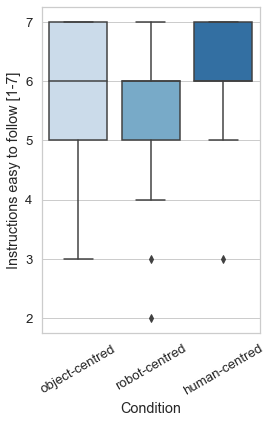

In [65]:
boxplot(
    x="Condition",
    y="Instructions easy to follow [1-7]",
    df=df,
    path=PT_PATH,
    aspect = 0.65
    )
statistical(df, "Instructions easy to follow [1-7]")
df[["Condition","Instructions easy to follow [1-7]"]].groupby(by="Condition").describe()

F_onewayResult(statistic=1.734959349593496, pvalue=0.18435536574573327)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred  -0.4783 0.1769 -1.1147 0.1582  False
 human-centred  robot-centred  -0.3478 0.3945 -0.9843 0.2886  False
object-centred  robot-centred   0.1304 0.8757  -0.506 0.7669  False
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 1.77e-01     
control  robot 3.95e-01     
  human  robot 8.76e-01     
----------------------------



Communicative skills [1-7]                                     \
                                    count      mean       std  min  25%  50%   
Condition                                                                      
human-centred                        23.0  6.043478  0.877924  4.0  5.5  6.0   
object-centred                       23.0  5.565217  0.787752  4.0  5.0  6.0   
robot-centred                        23.0  5.695652  1.019571  4.0  5.0  6.0   

                          
                75%  max  
Condition                 
human-centred   7.0  7.0  
object-centred  6.0  7.0  
robot-centred   6.0  7.0

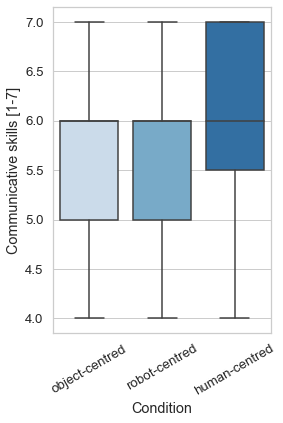

In [66]:
boxplot(
    x="Condition",
    y="Communicative skills [1-7]",
    df=df,
    path = PT_PATH,
    aspect = 0.65
    )
statistical(df, "Communicative skills [1-7]")
df[["Condition","Communicative skills [1-7]"]].groupby(by="Condition").describe()

# Research Question 1 - Human mental model

### Heatmap: Condition VS ideal Condition

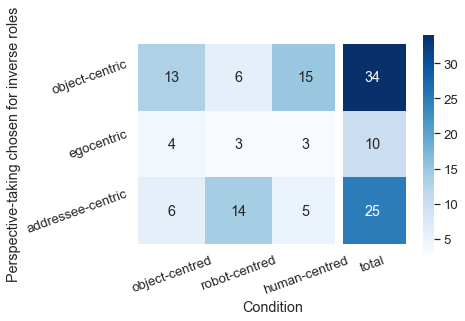

In [67]:
df_aux = df[["Condition", "If you were to tell the robot to pick up the objects how would you do it?"]].value_counts().copy()
df_heatmap = pd.DataFrame(columns=['Condition', 'Perspective-taking chosen for inverse roles', 'Occurrences'], dtype="float")
for condition_pair, occupance, in df_aux.iteritems():
    ideal_condition = "addressee-centric" if "your" in condition_pair[1] else "egocentric" if "my" in condition_pair[1] else "object-centric"
    df_heatmap = df_heatmap.append({
        'Condition': condition_pair[0],
        'Perspective-taking chosen for inverse roles': ideal_condition,
        'Occurrences': occupance},
        ignore_index=True)

total = df_heatmap[["Perspective-taking chosen for inverse roles", "Occurrences"]].groupby("Perspective-taking chosen for inverse roles").sum().to_dict()["Occurrences"]
for key, value in total.items():
    df_heatmap = df_heatmap.append({
        'Condition': "total",
        'Perspective-taking chosen for inverse roles': key,
        'Occurrences': value},
        ignore_index=True)

df_heatmap = df_heatmap.pivot("Perspective-taking chosen for inverse roles", "Condition", "Occurrences")
# sorting
df_heatmap = df_heatmap[["object-centred", "robot-centred", "human-centred","total"]]
df_heatmap = df_heatmap.reindex(["object-centric", "egocentric", "addressee-centric"])

ax = sns.heatmap(df_heatmap, annot=True, cmap = "Blues", square="True")
ax.axvline(3, color='white', lw=8)
plt.yticks(rotation=20)
plt.xticks(rotation=20)
plt.savefig(f"./{PT_PATH}/Condition_chosen_for_inverse_roles.pdf",bbox_inches='tight')
     

### Egocentric vs Addressee-centric

In the robot's perspective

,Aligned with the robot,Opposed to the robot
I 1,4.347826,95.652174
I 8,65.217391,34.782609
I 15,82.608696,17.391304


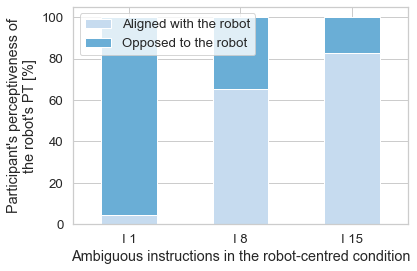

In [68]:
df_mental_model_robot = pd.DataFrame(index=["I 1", "I 8", "I 15"], columns=["Aligned with the robot", "Opposed to the robot"])
df_mental_model_robot.loc["I 1", "Aligned with the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q1"]=="allocentric"].shape[0]*100/df[df["Condition"]=="object-centred"].shape[0]
df_mental_model_robot.loc["I 8", "Aligned with the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q8"]=="allocentric"].shape[0]*100/df[df["Condition"]=="robot-centred"].shape[0]
df_mental_model_robot.loc["I 15", "Aligned with the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q15"]=="allocentric"].shape[0]*100/df[df["Condition"]=="human-centred"].shape[0]
df_mental_model_robot.loc["I 1", "Opposed to the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q1"]=="egocentric"].shape[0]*100/df[df["Condition"]=="object-centred"].shape[0]
df_mental_model_robot.loc["I 8", "Opposed to the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q8"]=="egocentric"].shape[0]*100/df[df["Condition"]=="robot-centred"].shape[0]
df_mental_model_robot.loc["I 15", "Opposed to the robot"] = df[df["Condition"]=="robot-centred"].loc[df["Mental Model Q15"]=="egocentric"].shape[0]*100/df[df["Condition"]=="human-centred"].shape[0]

df_mental_model_robot.plot(kind='bar', stacked=True)
plt.xlabel("Ambiguous instructions in the robot-centred condition")
plt.ylabel("Participant's perceptiveness of\nthe robot's PT [%]")
plt.xticks(rotation=0)
plt.savefig(f"./{PT_PATH}/Mental_model_robot.pdf",bbox_inches='tight')

# df[["Condition", "Mental Model Q1", "Mental Model Q8", "Mental Model Q15"]].groupby("Condition").describe()
df_mental_model_robot

In the human's perspective

,Aligned with the robot,Opposed to the robot
I 1,95.652174,4.347826
I 8,95.652174,4.347826
I 15,100.0,0.0


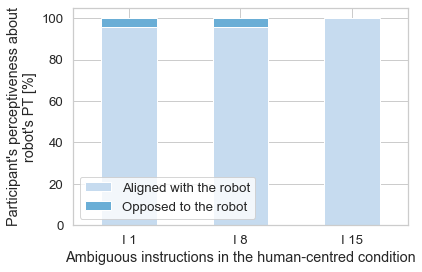

In [69]:
df_mental_model_human = pd.DataFrame(index=["I 1", "I 8", "I 15"], columns=["Aligned with the robot", "Opposed to the robot"])
df_mental_model_human.loc["I 1", "Opposed to the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q1"]=="allocentric"].shape[0]*100/df[df["Condition"]=="object-centred"].shape[0]
df_mental_model_human.loc["I 8", "Opposed to the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q8"]=="allocentric"].shape[0]*100/df[df["Condition"]=="robot-centred"].shape[0]
df_mental_model_human.loc["I 15", "Opposed to the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q15"]=="allocentric"].shape[0]*100/df[df["Condition"]=="human-centred"].shape[0]
df_mental_model_human.loc["I 1", "Aligned with the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q1"]=="egocentric"].shape[0]*100/df[df["Condition"]=="object-centred"].shape[0]
df_mental_model_human.loc["I 8", "Aligned with the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q8"]=="egocentric"].shape[0]*100/df[df["Condition"]=="robot-centred"].shape[0]
df_mental_model_human.loc["I 15", "Aligned with the robot"] = df[df["Condition"]=="human-centred"].loc[df["Mental Model Q15"]=="egocentric"].shape[0]*100/df[df["Condition"]=="human-centred"].shape[0]
df_mental_model_human.plot(kind='bar', stacked=True)
plt.xlabel("Ambiguous instructions in the human-centred condition")
plt.ylabel("Participant's perceptiveness about\nrobot's PT [%]")
plt.xticks(rotation=0)
plt.savefig(f"./{PT_PATH}/Mental_model_human.pdf",bbox_inches='tight')

# df[["Condition", "Mental Model Q1", "Mental Model Q8", "Mental Model Q15"]].groupby("Condition").describe()
df_mental_model_human

Merge of both

,Egocentric,Addressee-centric
I 1,95.652174,4.347826
I 8,65.217391,34.782609
I 15,58.695652,41.304348


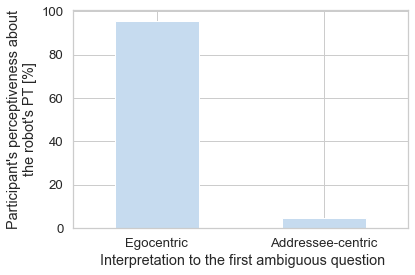

In [70]:
df_mental_model = (100-df_mental_model_robot+df_mental_model_human)/2
df_mental_model.rename(columns = {
        "Aligned with the robot" : "Egocentric",
        "Opposed to the robot"   : "Addressee-centric"
        }, inplace = True)
        
df_mental_model.loc["I 1"].plot(kind='bar', stacked=True)

plt.xlabel(" Interpretation to the first ambiguous question")
plt.ylabel("Participant's perceptiveness about\nthe robot's PT [%]")
plt.xticks(rotation=0)
plt.savefig(f"./{PT_PATH}/Mental_model.pdf",bbox_inches='tight')

df_mental_model

# Research Question 2 - Prosocial Behaviour

In [71]:
PB_PATH = "../../../../HandIns/Thesis/Figures/PB"#"Plots/PB"
try: os.system("mkdir "+PB_PATH)
except: pass # Path already exists

mkdir: ../../../../HandIns/Thesis/Figures/PB: File exists


## Reading sentences aloud to the robot

### Adherence to the PB task

Percentage of participants who read sentences to the robot

In [72]:
pb_read_sentences = df[df["Did you read sentences to the robot?"]=="Yes"]["Condition"].value_counts().reindex(["object-centred", "robot-centred", "human-centred"])
print(pb_read_sentences)

participants_per_condition = df["Condition"].value_counts().reindex(["object-centred", "robot-centred", "human-centred"])

pb_read_sentences_rate = 100*pb_read_sentences/participants_per_condition
print(pb_read_sentences_rate)


object-centred    20
robot-centred     13
human-centred     23
Name: Condition, dtype: int64
object-centred     86.956522
robot-centred      56.521739
human-centred     100.000000
Name: Condition, dtype: float64


Percentage of participants who showed interest in the PB (voluntary) task

In [73]:
pb_second_task = df[df["Sentences read"].isna()]["Condition"].value_counts().reindex(["object-centred", "robot-centred", "human-centred"]).fillna(0)
print(participants_per_condition-pb_second_task)
pb_second_task_rate = 100*(df["Condition"].value_counts().reindex(["object-centred", "robot-centred", "human-centred"])-pb_second_task)/participants_per_condition
print(pb_second_task_rate)

object-centred    21.0
robot-centred     16.0
human-centred     23.0
Name: Condition, dtype: float64
object-centred     91.304348
robot-centred      69.565217
human-centred     100.000000
Name: Condition, dtype: float64


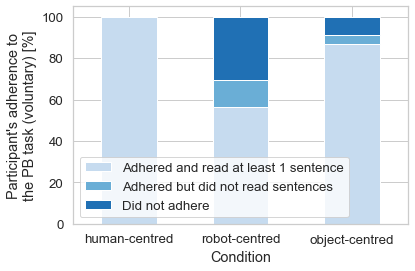

In [74]:
df_voluntary_task = pd.DataFrame(index=["human-centred", "robot-centred", "object-centred"], columns=["Adhered and read at least 1 sentence", "Adhered but did not read sentences", "Did not adhere"])

df_voluntary_task.loc["object-centred", "Adhered and read at least 1 sentence"] = pb_read_sentences_rate[0]
df_voluntary_task.loc["object-centred", "Adhered but did not read sentences"] = pb_second_task_rate[0] - pb_read_sentences_rate[0]
df_voluntary_task.loc["object-centred", "Did not adhere"] = 100 - pb_second_task_rate[0]

df_voluntary_task.loc["robot-centred", "Adhered and read at least 1 sentence"] = pb_read_sentences_rate[1]
df_voluntary_task.loc["robot-centred", "Adhered but did not read sentences"] = pb_second_task_rate[1] - pb_read_sentences_rate[1]
df_voluntary_task.loc["robot-centred", "Did not adhere"] = 100 - pb_second_task_rate[1]

df_voluntary_task.loc["human-centred", "Adhered and read at least 1 sentence"] = pb_read_sentences_rate[2]
df_voluntary_task.loc["human-centred", "Adhered but did not read sentences"] = pb_second_task_rate[2] - pb_read_sentences_rate[2]
df_voluntary_task.loc["human-centred", "Did not adhere"] = 100 - pb_second_task_rate[2]

df_voluntary_task.plot(kind='bar', stacked=True)
plt.xlabel("Condition")
plt.ylabel("Participant's adherence to\nthe PB task (voluntary) [%]")
plt.xticks(rotation=0)
plt.savefig(f"./{PB_PATH}/Adherence_PB_task.pdf",bbox_inches='tight')


### Sentences read

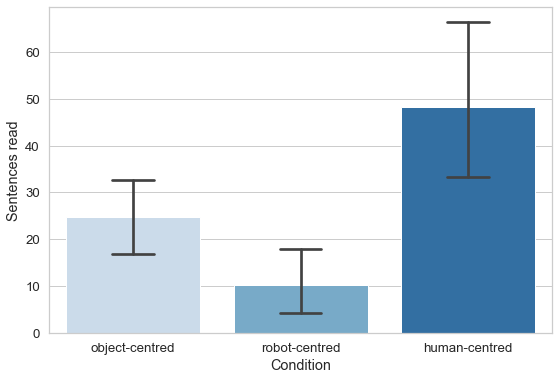

In [75]:
barplot(
    x="Condition",
    y="Sentences read",
    df=df.fillna(0),
    path = PB_PATH,
    aspect = 1.5
    )

In [76]:
df[["Condition", "Sentences read", "Prosocial behaviour time [min]"]].fillna(0).groupby("Condition").describe()

Sentences read                                               \
                        count       mean        std  min   25%   50%   75%   
Condition                                                                    
human-centred            23.0  48.173913  39.373101  3.0  21.0  40.0  56.0   
object-centred           23.0  24.695652  21.233410  0.0  12.0  16.0  35.5   
robot-centred            23.0  10.217391  17.172802  0.0   0.0   4.0  12.0   

                      Prosocial behaviour time [min]                      \
                  max                          count      mean       std   
Condition                                                                  
human-centred   150.0                           23.0  7.181884  4.956383   
object-centred   79.0                           23.0  3.933333  3.227811   
robot-centred    73.0                           23.0  1.942754  2.958214   

                                                                   
                     min       25%       50%       75%        max  
Condition                                                          
human-centred   1.616667  4.775000  5.400000  7.708333  22.566667  
object-centred  0.000000  1.783333  3.933333  4.866667  12.650000  
robot-centred   0.000000  0.000000  1.133333  2.666667  13.183333

In [77]:
statistical(df, "Sentences read")

F_onewayResult(statistic=11.02688981888106, pvalue=7.383559724802273e-05)
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------
 human-centred object-centred -23.4783 0.0147 -43.0384  -3.9181   True
 human-centred  robot-centred -37.9565    0.0 -57.5167 -18.3964   True
object-centred  robot-centred -14.4783  0.186 -34.0384   5.0819  False
----------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 1.47e-02 *   
control  robot 4.79e-05 ****
  human  robot 1.86e-01     
----------------------------



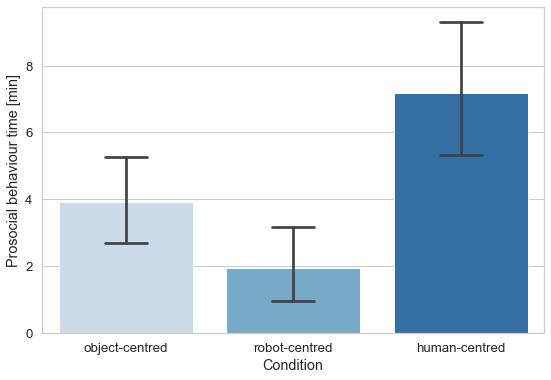

In [78]:
barplot(
    x="Condition",
    y="Prosocial behaviour time [min]",
    df=df.replace({pd.NaT: 0.0}),
    path = PB_PATH,
    aspect = 1.5
    )


In [79]:
statistical(df, "Prosocial behaviour time [min]")

F_onewayResult(statistic=11.034182186890872, pvalue=7.343315083218775e-05)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred  -3.2486 0.0144 -5.9482 -0.5489   True
 human-centred  robot-centred  -5.2391    0.0 -7.9388 -2.5395   True
object-centred  robot-centred  -1.9906 0.1883 -4.6902   0.709  False
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 1.44e-02 *   
control  robot 4.78e-05 ****
  human  robot 1.88e-01     
----------------------------



In [80]:
def pairwise_ttest(df, metric, fillna = 0):

    human_control = ttest_ind(df[df['Condition']=='human-centred'][metric].fillna(fillna), df[df['Condition']=='object-centred'][metric].fillna(fillna)).pvalue
    human_robot = ttest_ind(df[df['Condition']=='human-centred'][metric].fillna(fillna), df[df['Condition']=='robot-centred'][metric].fillna(fillna)).pvalue
    control_robot = ttest_ind(df[df['Condition']=='object-centred'][metric].fillna(fillna), df[df['Condition']=='robot-centred'][metric].fillna(fillna)).pvalue

    # compute the starts
    stars_boundaries = [5e-2, 1e-2, 1e-3, 1e-4]
    starts = ['*'*list(pair<=stars_boundaries).count(True) + " "*list(pair<=stars_boundaries).count(False) for pair in [human_control, human_robot, control_robot]]

    print(f"""
    ===============================================
        group1         group2      pvalue    starts          
    -----------------------------------------------
    human-centred object-centred   {human_control:.2e}  {starts[0]}
    human-centred  robot-centred   {human_robot:.2e}  {starts[1]}
    object-centred  robot-centred  {control_robot:.2e}  {starts[2]}
    -----------------------------------------------
    """)

In [81]:
pairwise_ttest(df, "Sentences read")


        group1         group2      pvalue    starts          
    -----------------------------------------------
    human-centred object-centred   1.56e-02  *   
    human-centred  robot-centred   1.14e-04  *** 
    object-centred  robot-centred  1.46e-02  *   
    -----------------------------------------------
    


In [82]:
pairwise_ttest(df, "Prosocial behaviour time [min]")


        group1         group2      pvalue    starts          
    -----------------------------------------------
    human-centred object-centred   1.16e-02  *   
    human-centred  robot-centred   7.89e-05  ****
    object-centred  robot-centred  3.46e-02  *   
    -----------------------------------------------
    


In [83]:
print(ttest_ind(df[df['Condition']=='robot-centred']['Sentences read'].fillna(0), df[df['Condition']=='object-centred']['Sentences read'].fillna(0)))
print(ttest_ind(df[df['Condition']=='robot-centred']['Prosocial behaviour time [min]'].fillna(0), df[df['Condition']=='object-centred']['Prosocial behaviour time [min]'].fillna(0)))

a = ttest_ind(df[df['Condition']=='robot-centred']['Sentences read'].fillna(0), df[df['Condition']=='object-centred']['Sentences read'].fillna(0))

a.pvalue

Ttest_indResult(statistic=-2.5426111319175475, pvalue=0.014596758916124728)
Ttest_indResult(statistic=-2.1803929680555556, pvalue=0.03461978084246626)


0.014596758916124728

## Subjective metrics

F_onewayResult(statistic=3.319843978547051, pvalue=0.042287193837986056)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
 human-centred object-centred  -0.2174 0.8953 -1.3797  0.9449  False
 human-centred  robot-centred  -1.1739 0.0472 -2.3362 -0.0116   True
object-centred  robot-centred  -0.9565 0.1269 -2.1188  0.2058  False
--------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 8.95e-01     
control  robot 4.72e-02 *   
  human  robot 1.27e-01     
----------------------------



Caring [1-7]                                             
                      count      mean       std  min  25%  50%  75%  max
Condition                                                               
human-centred          23.0  4.695652  1.663370  1.0  4.0  5.0  6.0  7.0
object-centred         23.0  4.478261  1.410015  2.0  3.0  5.0  5.5  7.0
robot-centred          23.0  3.521739  1.830786  1.0  2.0  4.0  5.0  7.0

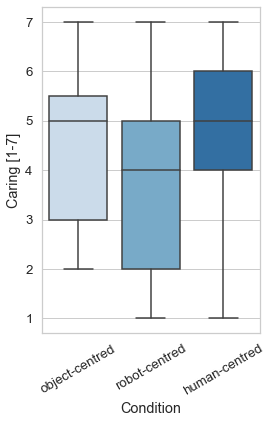

In [84]:
boxplot(
    x="Condition",
    y="Caring [1-7]",
    df=df,
    path = PB_PATH,
    aspect = 0.65
    )
statistical(df, "Caring [1-7]")
df[["Condition","Caring [1-7]"]].groupby(by="Condition").describe()

In [85]:
pairwise_ttest(df, "Caring [1-7]")


        group1         group2      pvalue    starts          
    -----------------------------------------------
    human-centred object-centred   6.35e-01      
    human-centred  robot-centred   2.78e-02  *   
    object-centred  robot-centred  5.34e-02      
    -----------------------------------------------
    


F_onewayResult(statistic=1.3894736842105264, pvalue=0.25639972368094516)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred  -0.3478 0.6837 -1.3484 0.6527  False
 human-centred  robot-centred  -0.6957 0.2255 -1.6962 0.3049  False
object-centred  robot-centred  -0.3478 0.6837 -1.3484 0.6527  False
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 6.84e-01     
control  robot 2.25e-01     
  human  robot 6.84e-01     
----------------------------



Likeable [1-7]                                             
                        count      mean       std  min  25%  50%  75%  max
Condition                                                                 
human-centred            23.0  5.565217  1.036870  3.0  5.0  6.0  6.0  7.0
object-centred           23.0  5.217391  1.277658  2.0  4.5  5.0  6.0  7.0
robot-centred            23.0  4.869565  1.816699  2.0  3.5  5.0  6.0  7.0

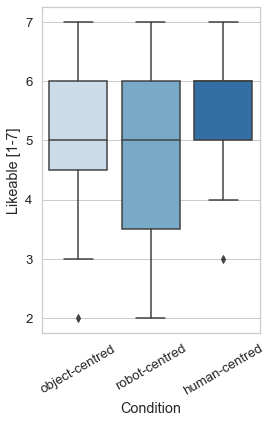

In [86]:
boxplot(
    x="Condition",
    y="Likeable [1-7]",
    df=df,
    path = PB_PATH,
    aspect = 0.65
    )
statistical(df, "Likeable [1-7]")
df[["Condition","Likeable [1-7]"]].groupby(by="Condition").describe()

F_onewayResult(statistic=0.42152230971128596, pvalue=0.6578009636684232)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred  -0.0435 0.9952 -1.1636 1.0767  False
 human-centred  robot-centred  -0.3913 0.6811 -1.5114 0.7288  False
object-centred  robot-centred  -0.3478  0.738  -1.468 0.7723  False
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 9.95e-01     
control  robot 6.81e-01     
  human  robot 7.38e-01     
----------------------------



Empathetic [1-7]                                             
                          count      mean       std  min  25%  50%  75%  max
Condition                                                                   
human-centred              23.0  3.869565  1.289973  1.0  3.0  4.0  4.5  6.0
object-centred             23.0  3.826087  1.370208  1.0  3.0  4.0  5.0  6.0
robot-centred              23.0  3.478261  1.997033  1.0  2.0  3.0  5.0  7.0

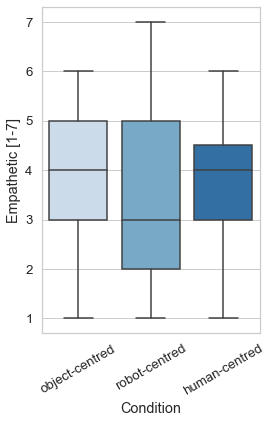

In [87]:
boxplot(
    x="Condition",
    y="Empathetic [1-7]",
    df=df,
    path = PB_PATH,
    aspect = 0.65
    )
statistical(df, "Empathetic [1-7]")
df[["Condition","Empathetic [1-7]"]].groupby(by="Condition").describe()

F_onewayResult(statistic=0.5731357552581262, pvalue=0.56653546189198)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred   0.2174 0.8972 -0.9564 1.3912  False
 human-centred  robot-centred  -0.3043 0.8088 -1.4782 0.8695  False
object-centred  robot-centred  -0.5217 0.5386 -1.6956 0.6521  False
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 8.97e-01     
control  robot 8.09e-01     
  human  robot 5.39e-01     
----------------------------



Need for collecting data [1-7]                                \
                                        count      mean       std  min  25%   
Condition                                                                     
human-centred                            23.0  4.913043  1.504933  1.0  4.0   
object-centred                           23.0  5.130435  1.516705  1.0  5.0   
robot-centred                            23.0  4.608696  1.924463  1.0  3.0   

                               
                50%  75%  max  
Condition                      
human-centred   5.0  6.0  7.0  
object-centred  5.0  6.0  7.0  
robot-centred   5.0  6.0  7.0

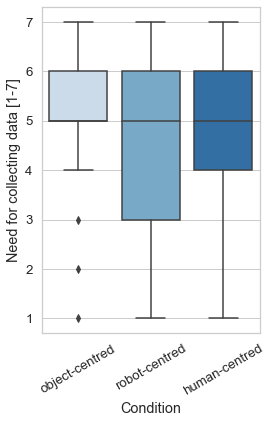

In [88]:
boxplot(
    x="Condition",
    y="Need for collecting data [1-7]",
    df=df,
    path = PB_PATH,
    aspect = 0.65
    )
statistical(df, "Need for collecting data [1-7]")
df[["Condition","Need for collecting data [1-7]"]].groupby(by="Condition").describe()

In [89]:
pairwise_ttest(df, "Need for collecting data [1-7]")


        group1         group2      pvalue    starts          
    -----------------------------------------------
    human-centred object-centred   6.28e-01      
    human-centred  robot-centred   5.53e-01      
    object-centred  robot-centred  3.13e-01      
    -----------------------------------------------
    


# Interpersonal Reactivity Index

In [90]:
# compute score for each participant
for i in range(df.shape[1]):
    if df.iloc[:,i].name == "I daydream and fantasize, with some regularity, about things that might happen to me.":
        iri_start = i
        break

iri_start
iri_rules = {
    "0" :   ["Fantasy Scale", "+"],
    "1" :   ["Empathic Concern Scale", "+"],
    "2" :   ["Perspective-Taking Scale", "-"],
    "3" :   ["Empathic Concern Scale", "-"],
    "4" :   ["Fantasy Scale", "+"],
    "5" :   ["Fantasy Scale", "-"],
    "6" :   ["Perspective-Taking Scale", "+"],
    "7" :   ["Empathic Concern Scale", "+"],
    "8" :   ["Perspective-Taking Scale", "+"],
    "9" :   ["Fantasy Scale", "-"],
    "10":   ["Empathic Concern Scale", "-"],
    "11":   ["Perspective-Taking Scale", "-"],
    "12":   ["Fantasy Scale", "+"],
    "13":   ["Empathic Concern Scale", "-"],
    "14":   ["Empathic Concern Scale", "+"],
    "15":   ["Perspective-Taking Scale", "+"],
    "16":   ["Empathic Concern Scale", "+"],
    "17":   ["Fantasy Scale", "+"],
    "18":   ["Perspective-Taking Scale", "+"],
    "19":   ["Fantasy Scale", "+"],
    "20":   ["Perspective-Taking Scale", "+"]
}

df_iri = pd.DataFrame()

for id in df.index: # for each participant
    pt, f, e = 0, 0, 0 # perspective-taking, fantasy, empathic

    for i, x in enumerate(list(df.loc[id][iri_start:iri_start+21])):
        if iri_rules[str(i)][0] == "Fantasy Scale":
            f += x if iri_rules[str(i)][1] == "+" else -x
        elif iri_rules[str(i)][0] == "Empathic Concern Scale":
            e += x if iri_rules[str(i)][1] == "+" else -x
        elif iri_rules[str(i)][0] == "Perspective-Taking Scale":
            pt += x if iri_rules[str(i)][1] == "+" else -x

    pt, f, e = pt/7.0, f/7.0, e/7.0
    
    df_iri = df_iri.append(
        {
            "id" : id,
            "Perspective-Taking Scale" : pt,
            "Empathic Concern Scale" : e,
            "Fantasy Scale" : f
        },
        ignore_index=True
    )

df_iri.set_index("id", inplace=True)

df = df.merge(df_iri, left_index=True, right_index=True, how="outer")


In [91]:
df[["Condition", "Do you think the manner the robot addressed the object influenced how much time you spent helping it?"]].groupby("Condition").describe()

Do you think the manner the robot addressed the object influenced how much time you spent helping it?  \
                                                                                                               count   
Condition                                                                                                              
human-centred                                                23.0                                                      
object-centred                                               20.0                                                      
robot-centred                                                13.0                                                      

                                                             
                    mean       std  min  25%  50%  75%  max  
Condition                                                    
human-centred   4.260870  1.737746  1.0  3.0  4.0  5.5  7.0  
object-centred  4.300000  1.809333  1.0  3.5  5.0  6.0  7.0  
robot-centred   3.846154  1.951331  1.0  2.0  4.0  5.0  7.0

In [92]:
for i in ["Perspective-Taking Scale", "Empathic Concern Scale", "Fantasy Scale"]:
    print(i)
    statistical(df, i)

Perspective-Taking Scale
F_onewayResult(statistic=0.2529025358997861, pvalue=0.7772926391471243)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
 human-centred object-centred  -0.0683 0.9195 -0.4878 0.3512  False
 human-centred  robot-centred   0.0559 0.9453 -0.3636 0.4754  False
object-centred  robot-centred   0.1242 0.7585 -0.2953 0.5437  False
-------------------------------------------------------------------

 group1 group2 pvalue  stars
----------------------------
control  human 9.19e-01     
control  robot 9.45e-01     
  human  robot 7.58e-01     
----------------------------

Empathic Concern Scale
F_onewayResult(statistic=0.6112814224402205, pvalue=0.5456984253323292)
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
--------------------

Divide participants into two groups

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              207 non-null    float64
 1   Objective metric                207 non-null    object 
 2   IRI                             207 non-null    object 
 3   Prosocial behaviour time [min]  207 non-null    float64
 4   Sentences read                  207 non-null    float64
dtypes: float64(3), object(2)
memory usage: 8.2+ KB


(array([0, 1, 2]),
 [Text(0, 0, 'Perspective-Taking Scale binary'),
  Text(1, 0, 'Fantasy Scale binary'),
  Text(2, 0, 'Empathic Concern binary')])

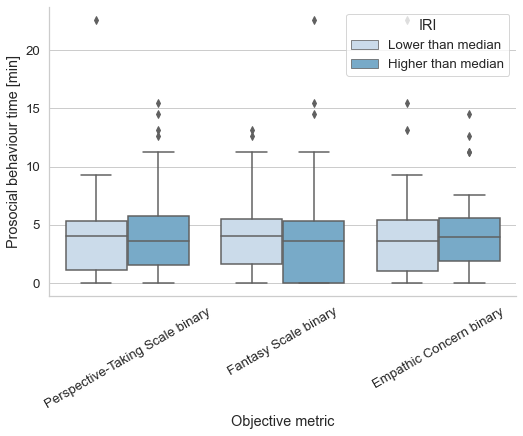

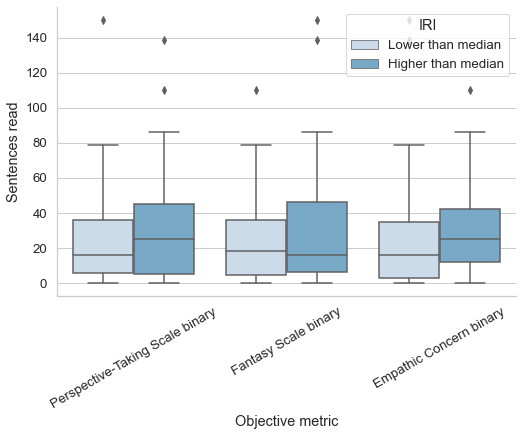

In [93]:
# df_iri = df[[ "Sentences read", "Prosocial behaviour time [min]"]].copy().fillna(0)

df_iri = pd.DataFrame()

df_iri["Perspective-Taking Scale binary"] = df["Perspective-Taking Scale"]>df["Perspective-Taking Scale"].median()

df_iri.replace(True, "Higher than median", inplace = True)
df_iri.replace(False, "Lower than median", inplace = True)

df_iri["Fantasy Scale binary"] = df["Fantasy Scale"]>df["Fantasy Scale"].median()

df_iri.replace(True, "Higher than median", inplace = True)
df_iri.replace(False, "Lower than median", inplace = True)

df_iri["Empathic Concern binary"] = df["Empathic Concern Scale"]>df["Empathic Concern Scale"].median()

df_iri.replace(True, "Higher than median", inplace = True)
df_iri.replace(False, "Lower than median", inplace = True)

df_iri = df_iri.stack().reset_index()

df_iri["Prosocial behaviour time [min]"] = 0
df_iri["Sentences read"] = 0

for i, j in enumerate(df_iri["level_0"]):
    df_iri.loc[i, "Prosocial behaviour time [min]"] = df["Prosocial behaviour time [min]"].loc[j]
    df_iri.loc[i, "Sentences read"] = df["Sentences read"].loc[j]

df_iri = df_iri.fillna(0)

df_iri.rename(columns = {
        0 : "IRI",
        "level_1" : "Objective metric",
        "level_0" : "Id"
        }, inplace = True)

df_iri.info()

sns.catplot(
    data = df_iri,
    hue = "IRI",
    y = "Prosocial behaviour time [min]",
    x = "Objective metric",
    kind = "box",
    orient = "v",
    legend_out = False,
    aspect = 1.5)
plt.xticks(rotation=30)

sns.catplot(
    data = df_iri,
    hue = "IRI",
    y = "Sentences read",
    x = "Objective metric",
    kind = "box",
    orient = "v",
    legend_out = False,
    aspect = 1.5)
plt.xticks(rotation=30)

# grouped_boxplot(df_iri, x = "IRI", y = "Sentences read", hue = "Objective metric", path = "Plots", aspect = 2, orient="v")


## Correlation

### Group definition

In [94]:
# A : Perspective-Taking
corr_pt = ["Total mistakes", "Perspective taking task time [min]"]
# B : Interpersonal Reactivity Index
corr_iri = ["Perspective-Taking Scale", "Empathic Concern Scale", "Fantasy Scale"]
# C : RoSas
corr_rosas = ["Communicative skills [1-7]", "Caring [1-7]", "Likeable [1-7]", "Empathetic [1-7]", "Need for collecting data [1-7]", "Instructions easy to follow [1-7]"]
# D : Prosocial Behaviour
corr_pb = ["Sentences read","Prosocial behaviour time [min]"]

### Computing correlation between groups

PT & IRI

In [95]:
# It should not be related 
correlation(df, corr_pt, corr_iri)

r( Total mistakes , Perspective-Taking Scale ) = -0.059
r( Total mistakes , Empathic Concern Scale ) = -0.040
r( Total mistakes , Fantasy Scale ) = -0.000
r( Perspective taking task time [min] , Perspective-Taking Scale ) = 0.023
r( Perspective taking task time [min] , Empathic Concern Scale ) = 0.004
r( Perspective taking task time [min] , Fantasy Scale ) = 0.054


PT & RoSas

In [96]:
# It should be realetd
correlation(df, corr_pt, corr_rosas)

r( Total mistakes , Communicative skills [1-7] ) = -0.266
r( Total mistakes , Caring [1-7] ) = -0.022
r( Total mistakes , Likeable [1-7] ) = -0.112
r( Total mistakes , Empathetic [1-7] ) = -0.004
r( Total mistakes , Need for collecting data [1-7] ) = -0.112
r( Total mistakes , Instructions easy to follow [1-7] ) = -0.320
r( Perspective taking task time [min] , Communicative skills [1-7] ) = -0.220
r( Perspective taking task time [min] , Caring [1-7] ) = -0.014
r( Perspective taking task time [min] , Likeable [1-7] ) = -0.172
r( Perspective taking task time [min] , Empathetic [1-7] ) = -0.046
r( Perspective taking task time [min] , Need for collecting data [1-7] ) = -0.165
r( Perspective taking task time [min] , Instructions easy to follow [1-7] ) = -0.273


PT & PB

In [97]:
#  Yes, definitively
correlation(df, corr_pt, corr_pb)

r( Total mistakes , Sentences read ) = -0.350
r( Total mistakes , Prosocial behaviour time [min] ) = -0.296
r( Perspective taking task time [min] , Sentences read ) = -0.336
r( Perspective taking task time [min] , Prosocial behaviour time [min] ) = -0.276


IRI & Rosas

In [98]:
# It should not be related 
correlation(df, corr_iri, corr_rosas)

r( Perspective-Taking Scale , Communicative skills [1-7] ) = 0.026
r( Perspective-Taking Scale , Caring [1-7] ) = 0.153
r( Perspective-Taking Scale , Likeable [1-7] ) = 0.023
r( Perspective-Taking Scale , Empathetic [1-7] ) = 0.021
r( Perspective-Taking Scale , Need for collecting data [1-7] ) = 0.218
r( Perspective-Taking Scale , Instructions easy to follow [1-7] ) = 0.004
r( Empathic Concern Scale , Communicative skills [1-7] ) = 0.111
r( Empathic Concern Scale , Caring [1-7] ) = 0.349
r( Empathic Concern Scale , Likeable [1-7] ) = 0.182
r( Empathic Concern Scale , Empathetic [1-7] ) = 0.087
r( Empathic Concern Scale , Need for collecting data [1-7] ) = -0.058
r( Empathic Concern Scale , Instructions easy to follow [1-7] ) = 0.092
r( Fantasy Scale , Communicative skills [1-7] ) = -0.009
r( Fantasy Scale , Caring [1-7] ) = 0.283
r( Fantasy Scale , Likeable [1-7] ) = 0.121
r( Fantasy Scale , Empathetic [1-7] ) = -0.056
r( Fantasy Scale , Need for collecting data [1-7] ) = 0.104
r( Fant

IRI & PB

In [99]:
# It should be weakly correlated
correlation(df, corr_iri, corr_pb)

r( Perspective-Taking Scale , Sentences read ) = 0.116
r( Perspective-Taking Scale , Prosocial behaviour time [min] ) = 0.098
r( Empathic Concern Scale , Sentences read ) = 0.052
r( Empathic Concern Scale , Prosocial behaviour time [min] ) = 0.043
r( Fantasy Scale , Sentences read ) = 0.087
r( Fantasy Scale , Prosocial behaviour time [min] ) = 0.114


Rosas & PB

In [100]:
# It's probable
correlation(df, corr_rosas, corr_pb)

r( Communicative skills [1-7] , Sentences read ) = 0.041
r( Communicative skills [1-7] , Prosocial behaviour time [min] ) = 0.035
r( Caring [1-7] , Sentences read ) = 0.364
r( Caring [1-7] , Prosocial behaviour time [min] ) = 0.318
r( Likeable [1-7] , Sentences read ) = 0.327
r( Likeable [1-7] , Prosocial behaviour time [min] ) = 0.267
r( Empathetic [1-7] , Sentences read ) = 0.048
r( Empathetic [1-7] , Prosocial behaviour time [min] ) = 0.014
r( Need for collecting data [1-7] , Sentences read ) = 0.330
r( Need for collecting data [1-7] , Prosocial behaviour time [min] ) = 0.332
r( Instructions easy to follow [1-7] , Sentences read ) = 0.211
r( Instructions easy to follow [1-7] , Prosocial behaviour time [min] ) = 0.206


# Validate datset

In [101]:
df = get_df_from_files()
df_backup = df.copy()       # save the initial
df = df.drop(index=[16])    # Rejection due to technical errors
for q in range(1,16):
    for idx in df.index:
        if (df.loc[idx, f"Tries Q{str(q)}"] - df.loc[idx, f"Mistakes Q{str(q)}"] - df.loc[idx, f"Help Q{str(q)}"]) != 1:
            
            print(df.loc[idx, ["Name", f"Tries Q{str(q)}"]])

# Create the excel with vouchers code given

In [102]:
df_vouchers = pd.read_json('./participants_info.json').transpose()
df_vouchers = df_vouchers[1:] #Take the data less the header row
df_vouchers.columns = ["Name", "Email", "Voucher Code"] #Set the header row as the df header
df_vouchers.head()
# determining the name of the file
file_name = 'JoaoAlmeida_MScThesis_GivenVouchers.xlsx'
# saving the excel
df_vouchers.to_excel(file_name)

ValueError: Expected object or value

# Statistical difference between instructions

In [ ]:
for i in range(1,16):
    print(f"Instruction {i}")
    statistical(df, f"Time Q{str(i)}")

# Dropping some columns and save the dataframe

In [ ]:
df_save = df.drop(["Name", "Force Quit", "Prosocial behaviour starting time", "Total Interaction Time", "Sentences read prior guess", "Submission time of the final questionnaire", "What made you decide when to stop the reading task?", "Do you think the manner the robot addressed the object influenced how much time you spent helping it?", "Even though the reading task was voluntary and you had already finished the experiment, what made you help the robot?", "How impactful can social robots be in the future? Which roles can they play?", "Do you have any final suggestions?", "Did you have any problem finding the objects that the robot was referring to? Describe the problem or leave this blank."], axis=1)

df_save.to_csv("./Dataset.csv")
